In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import tensorflow as tf

2024-06-08 13:52:55.150245: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-08 13:52:55.871823: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/yw/miniconda3/envs/tf/lib/
2024-06-08 13:52:55.871963: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/yw/miniconda3/envs/tf/lib/
2024-06-08 13:52:55.871971: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries

In [4]:
import tensorflow.keras.backend as K

In [5]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import matplotlib.pyplot as plt

In [131]:
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart

def send_email_outlook(subject, body, to_email, from_email, password):
    # Set up the email server
    server = smtplib.SMTP('smtp-mail.outlook.com', 587)
    server.starttls()  # Use TLS
    server.login(from_email, password)

    # Create the email
    msg = MIMEMultipart()
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = subject

    # Add body to email
    msg.attach(MIMEText(body, 'plain'))

    # Send the email
    server.send_message(msg)
    server.quit()

def send_email_mailgun(subject, body, to_email):
    # Set up the email server
    from_email = "postmaster@sandboxf2605f56baa541c1ac6147fe4068bfec.mailgun.org"
    password = "249f7b0de089885203f87e8bf90f5cff-a4da91cf-09301798"
    server = smtplib.SMTP('smtp.mailgun.org', 587)
    server.starttls()  # Use TLS
    server.login(from_email, password)

    # Create the email
    msg = MIMEMultipart()
    msg['From'] = from_email
    msg['To'] = to_email
    msg['Subject'] = subject

    # Add body to email
    msg.attach(MIMEText(body, 'plain'))

    # Send the email
    server.send_message(msg)
    server.quit()

# Replace the following with your details
# your_email = "yong_515@outlook.com"
# your_password = "Ner0sub!ime"  # Your app password or password if less secure apps are enabled
# send_email("End of training", "Model Training has finished.", your_email, your_email, your_password)


In [7]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_virtual_device_configuration(gpus[0], [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1024*6)])
  except RuntimeError as e:
    print(e)

In [7]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


ValueError: Cannot set memory growth on device when virtual devices configured

In [8]:
df = pd.read_csv('edge_images/preprocessed.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53416 entries, 0 to 53415
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            53416 non-null  object 
 1   Sex           53416 non-null  object 
 2   Height        53416 non-null  object 
 3   Weight        53416 non-null  object 
 4   Hair          53416 non-null  object 
 5   Eyes          53416 non-null  object 
 6   Race          53416 non-null  object 
 7   Sex Offender  53416 non-null  bool   
 8   Offense       53416 non-null  object 
 9   Height_cm     53416 non-null  float64
 10  Weight_kg     53416 non-null  float64
dtypes: bool(1), float64(2), object(8)
memory usage: 4.1+ MB


In [10]:
import os

img_path = 'edge_images/side/side/'

img_filenames = os.listdir(img_path)

img_filenames = pd.Series(img_filenames).apply(lambda x : str(x).split('.')[0])

In [11]:
np.any(~df['ID'].isin(img_filenames))

False

In [12]:
data = df[['ID', 'Weight_kg']]

In [13]:
data['ID'] = img_path+data['ID']+'.jpg'

/tmp/ipykernel_753967/2183077761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ID'] = img_path+data['ID']+'.jpg'


In [14]:
data['ID']


0        edge_images/side/side/A00147.jpg
1        edge_images/side/side/A00198.jpg
2        edge_images/side/side/A01072.jpg
3        edge_images/side/side/A01077.jpg
4        edge_images/side/side/A01148.jpg
                       ...               
53411    edge_images/side/side/Y29993.jpg
53412    edge_images/side/side/Y29994.jpg
53413    edge_images/side/side/Y29996.jpg
53414    edge_images/side/side/Y30000.jpg
53415    edge_images/side/side/Y54605.jpg
Name: ID, Length: 53416, dtype: object

In [15]:
train_data = data[:int(0.8 * len(data))]  # 80% of data for training
val_data = data[int(0.8 * len(data)):int(0.9 * len(data))]  # next 10% of data for validation
test_data = data[int(0.9 * len(data)):]  # last 10% of data for testing

# convert to tuple
train_data = (train_data['ID'].values, train_data['Weight_kg'].values)
val_data = (val_data['ID'].values, val_data['Weight_kg'].values)
test_data = (test_data['ID'].values, test_data['Weight_kg'].values)

In [16]:
train_data

(array(['edge_images/side/side/A00147.jpg',
        'edge_images/side/side/A00198.jpg',
        'edge_images/side/side/A01072.jpg', ...,
        'edge_images/side/side/Y14368.jpg',
        'edge_images/side/side/Y14370.jpg',
        'edge_images/side/side/Y14371.jpg'], dtype=object),
 array([ 83.91452 ,  86.18248 ,  88.45044 , ...,  81.64656 , 118.387512,
         74.84268 ]))

In [17]:
BATCH_SIZE = 32

In [18]:
# read images file by file path
def read_imgs(file_paths):
    imgs = tf.TensorArray(tf.float32, size=BATCH_SIZE)
    i=0
    for file_path in file_paths:
        img = tf.io.read_file(file_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, (224, 224))
        img = preprocess_input(img)
        imgs = imgs.write(i, img)
        i+=1
    return imgs.stack()

In [19]:
train_data[0][:5]

array(['edge_images/side/side/A00147.jpg',
       'edge_images/side/side/A00198.jpg',
       'edge_images/side/side/A01072.jpg',
       'edge_images/side/side/A01077.jpg',
       'edge_images/side/side/A01148.jpg'], dtype=object)

In [20]:
# your_email = "yong_515@outlook.com"
# your_password = "Ner0sub!ime"  # Your app password or password if less secure apps are enabled
# send_email("End of training", "Model Training has finished.", your_email, your_email, your_password)

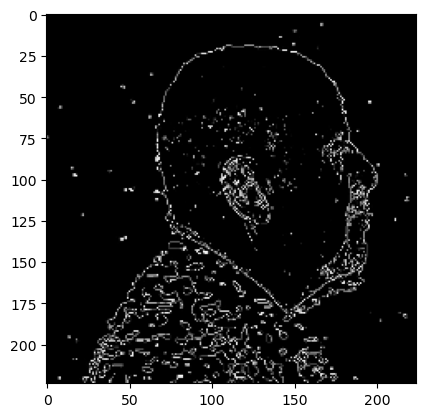

In [21]:
plt.imshow(tf.cast(read_imgs(train_data[0][:5])[0], tf.int32))

In [22]:
# run eagerly
# tf.config.run_functions_eagerly(True)
train_set = tf.data.Dataset.from_tensor_slices(train_data).shuffle(10000).batch(BATCH_SIZE, drop_remainder=True).map(lambda x, y: (read_imgs(x), y)).prefetch(1)
val_set = tf.data.Dataset.from_tensor_slices(val_data).shuffle(10000).batch(BATCH_SIZE, drop_remainder=True).map(lambda x, y: (read_imgs(x), y)).prefetch(1)
test_set = tf.data.Dataset.from_tensor_slices(test_data).shuffle(10000).batch(BATCH_SIZE, drop_remainder=True).map(lambda x, y: (read_imgs(x), y)).prefetch(1)

In [23]:
# Data augmentation layers
data_augmentation_front = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomBrightness(factor = (-0.15, 0.1)),  # adjust according to your needs
    tf.keras.layers.RandomZoom(height_factor=(-0.1, 0.05)),        # adjust according to your needs
])
data_augmentation_side = tf.keras.Sequential([
    tf.keras.layers.RandomBrightness(factor = (-0.25, 0.1)),  # adjust according to your needs
    tf.keras.layers.RandomContrast(0.5),    # adjust according to your needs
    tf.keras.layers.RandomZoom(height_factor=(-0.2, 0.1)),        # adjust according to your needs
])

In [114]:
# create model
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

model = tf.keras.Sequential([
    data_augmentation_side,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1)
])

# train

In [115]:
for i, layers in enumerate(base_model.layers) : 
    print(i, layers.name)

0 input_7
1 rescaling_12
2 normalization_6
3 rescaling_13
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activa

In [138]:
base_model.trainable = True

N = 0
for layer in base_model.layers [:N]: 
    layer.trainable = False

model.build(input_shape=(None, 224,224,3))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
K.set_value(model.optimizer.learning_rate, model.optimizer.learning_rate)
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d_6   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 4,050,852
Trainable params: 4,008,829
Non-trainable params: 42,023
_________________________________________________________________


In [125]:
dense_weights = model.layers[-1].get_weights()

In [87]:
dense_layer = model.layers[-1]

dense_layer.set_weights(dense_weights)

In [139]:
model.load_weights('models/edge_model/side_edge_5')

In [140]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

In [141]:
tf.get_logger().setLevel('ERROR')

In [142]:
model.fit(train_set, validation_data=val_set, epochs=100, callbacks = [early_stopping])

Epoch 1/100
1335/1335 [==============================] - 506s 371ms/step - loss: 195.5001 - mae: 10.6443 - val_loss: 223.5302 - val_mae: 11.9808
Epoch 2/100
1335/1335 [==============================] - 496s 372ms/step - loss: 179.6564 - mae: 10.2383 - val_loss: 231.4327 - val_mae: 12.1692
Epoch 3/100
1335/1335 [==============================] - 496s 372ms/step - loss: 172.3639 - mae: 10.0238 - val_loss: 179.1303 - val_mae: 10.2235
Epoch 4/100
1335/1335 [==============================] - 496s 372ms/step - loss: 166.9157 - mae: 9.8941 - val_loss: 183.7571 - val_mae: 10.3719
Epoch 5/100
1335/1335 [==============================] - 492s 369ms/step - loss: 160.8435 - mae: 9.7604 - val_loss: 185.5950 - val_mae: 10.4296
Epoch 6/100
1335/1335 [==============================] - 493s 370ms/step - loss: 155.3191 - mae: 9.6092 - val_loss: 185.3807 - val_mae: 10.5142
Epoch 7/100
1335/1335 [==============================] - 495s 371ms/step - loss: 149.3322 - mae: 9.4472 - val_loss: 181.4885 - val_ma

In [136]:
import requests
def send_telegram_message(bot_token, chat_id, message):
    url = f"https://api.telegram.org/bot{bot_token}/sendMessage"
    payload = {"chat_id": chat_id, "text": message}
    response = requests.post(url, data=payload)
    return response.json()

# bot_token = '7217981545:AAE4RgPEDfmRVxGOBtegWEfWIAo4V06ZgVU'
# chat_id = '6183060417'
# message = 'Your Training is finished!'
# print(send_telegram_message(bot_token, chat_id, message))


{'ok': True, 'result': {'message_id': 3, 'from': {'id': 7217981545, 'is_bot': True, 'first_name': 'NotificationBot', 'username': 'Noti73510Bot'}, 'chat': {'id': 6183060417, 'first_name': 'polypenol82', 'username': 'polypenol82', 'type': 'private'}, 'date': 1717839352, 'text': 'Your Training is finished!'}}


In [143]:
print(send_telegram_message(bot_token, chat_id, message))

{'ok': True, 'result': {'message_id': 4, 'from': {'id': 7217981545, 'is_bot': True, 'first_name': 'NotificationBot', 'username': 'Noti73510Bot'}, 'chat': {'id': 6183060417, 'first_name': 'polypenol82', 'username': 'polypenol82', 'type': 'private'}, 'date': 1717843579, 'text': 'Your Training is finished!'}}


In [144]:
model.evaluate(test_set)

166/166 [==============================] - 7s 40ms/step - loss: 178.3527 - mae: 10.1906


[178.3526611328125, 10.190610885620117]

In [123]:
model.save_weights('models/edge_model/side_edge_5')